<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./2_1_S6_advanced_data_access_eumdac.ipynb" target="_blank"><< Advanced Sentinel-6 data access with the EUMDAC client</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./2_3_S6_coastal_waveforms.ipynb">Coastal waveforms >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT), Vinca Rosmorduc (CLS)

<html>
<div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-s6"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg?style=flat&logo=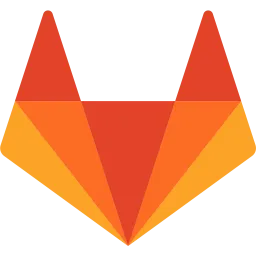" alt="Open in EUMETLAB"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://user.eumetsat.int/search-view?sort=startDate%20desc&facets=%7B%22contentTypes%22:%5B%22Resources%7CSoftware%20%26%20code%22%5D,%22theme%22:%5B%22Marine%22,%22Marine%7CMaritime%20safety%22,%22Marine%7COcean%20biogeochemistry%22,%22Marine%7COcean%20dynamics%22,%22Marine%7CWater%20quality%22%5D,%22org-satellite-sensor%22:%5B%22EUMETSAT%7CSentinel-6%22,%22EUMETSAT%7CSentinel-6%7CAMR-C%22,%22EUMETSAT%7CSentinel-6%7CDORIS%22,%22EUMETSAT%7CSentinel-6%7CGNSS-RO%22,%22EUMETSAT%7CSentinel-6%7CLRA%22,%22EUMETSAT%7CSentinel-6%7CPoseidon-4%22%5D%7D"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg?style=flat&logo=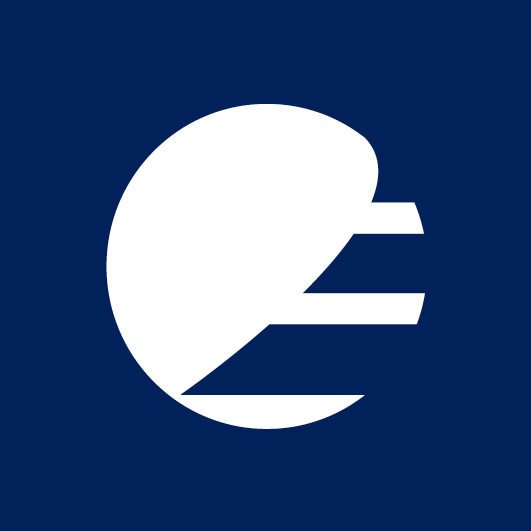" alt="Open in user portal"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-s6/HEAD?urlpath=%2Ftree%2F2_S6_advanced%2F2_2_acquire_S6_full_cycle.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Launch on Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/learn-s6/2_S6_advanced/2_2_acquire_S6_full_cycle.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Launch on WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div> 
</html>

<div class="alert alert-block alert-success">
<h3>Learn Sentinel-6: Advanced</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has the following prerequisites:
- **<a href="https://eoportal.eumetsat.int/" target="_blank">A EUMETSAT Earth Observation Portal account</a>** to use the EUMETSAT Data Store
    
There are no prerequisite notebooks for this module.
</div>
<hr>

# 2.2 Acquiring a full Sentinel-6 cycle

### Data used

| Dataset | EUMETSAT collection ID| EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:--------:|
| Sentinel-6 Poseidon-4 Altimetry level 2 Low Resolution (baseline version F08; reprocessed)  | EO:EUM:DAT:0842 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:0842" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-6:0842| <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-6%3A0842" target="_blank">Description</a> |

### Learning outcomes

At the end of this notebook you will know;
* <font color="#138D75">**Search**</font> for a time series of L2 Sentinel-6 data for a given cycle number using the EUMETSAT Data Store API client (`eumdac`)
* <font color="#138D75">**Download**</font> this time series

### Outline

The EUMETSAT Data Store offers many ways to interact with data in order to refine searches. Many of these methods are supported by the EUMETSAT Data Access Client (`eumdac`). In this notebook we will showcase some of the possibilities for using `eumdac` to better interact with Sentinel-6 collections.

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
1. [Step 1: Authenticating the API](#section1)
1. [Step 2: Creating a search by collection](#section2)
1. [Step 3: Filtering by cycle number](#section3)
1. [Step 4: Downloading the data](#section4)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [2]:
import os
import json
import datetime
import shutil
import eumdac
import zipfile
from shapely import geometry

# Create a download directory for our Sentinel-6 products
download_dir = os.path.join(os.getcwd(), "products")
os.makedirs(download_dir, exist_ok=True)

<div class="alert alert-info" role="alert">

## <a id='section1'></a>Step 1: Authenticating the API
[Back to top](#TOC_TOP)

</div>

Before we use the Data Store to download data, we must first authenticate our access and retrieve an access token. More **essential** information on setting this up can be found in the **<a href="../1_S6_introductory/1_1b_S6_data_access_DS.ipynb">1_1b_S6_data_access_DS</a>** notebook.

In [3]:
# load credentials
with open(os.path.join(os.path.expanduser("~"),'.eumdac_credentials')) as json_file:
    credentials = json.load(json_file)
    token = eumdac.AccessToken((credentials['consumer_key'], credentials['consumer_secret']))
    print(f"This token '{token}' expires {token.expiration}")

# create data store object
datastore = eumdac.DataStore(token)

This token 'dff0ff08-f02f-330a-bffd-2fe2245aa123' expires 2024-03-19 12:24:37.073187


<div class="alert alert-info" role="alert">

## <a id='section2'></a>Step 2: Creating a search by collection
[Back to top](#TOC_TOP)

</div>

We will work with the Sentinel-6 level-2 low resolution data throughout this notebook. The collection ID for the latest version of this data type is `EO:EUM:DAT:0842`. You can find this information on the Data Store (https://data.eumetsat.int/), or ask the `eumdac` client to tell you all the available collections by calling the `eumdac.DataStore(token).collections` method.

In [4]:
# set collection ID for S6 Poseidon-4 L2 low resolution reprocessing
collectionID = 'EO:EUM:DAT:0842'
cycle = 53

To filter by collection, we simply provide the collectionID to the `datastore.get_collection method`

In [5]:
# Use collection ID
selected_collection = datastore.get_collection(collectionID)
print(f"{selected_collection.title}\n---\n{selected_collection.abstract}")

Poseidon-4 Altimetry Level 2 Low Resolution (baseline version F08) - Sentinel-6 - Reprocessed
---
This is a reprocessed dataset at baseline F08, which is continued by the NTC data stream from 09/Feb/2023 onwards. The product contain the typical altimetry measurements, like the altimeter range, the sea surface height, the wind speed, significant wave height and all required geophysical corrections and related flags derived from LR. Two measurement data files are available (standard and reduced), each with a different number of variables. The standard data file includes 1 Hz and 20 Hz measurements for the Ku- and C-bands as well as geophysical corrections at 1 Hz and some at 20 Hz. The reduced data file contains only 1 Hz measurements for the Ku- and C-bands as well as geophysical corrections at 1 Hz. These products are suitable for users seeking information on sea state and those creating downstream added value products from multiple altimeters. Sentinel-6 is part of a series of Sentine

<div class="alert alert-info" role="alert">

## <a id='section3'></a>Step 3: Filtering by cycle number
[Back to top](#TOC_TOP)

</div>

Now that we have our collection we can search within it using the cycle number to filter the results, as follows;

In [6]:
products = selected_collection.search(
    cycle=cycle)
print(f"Found {len(products)} products")

Found 254 products


We can, of course, also filter by timeliness and ROI as follows, should we wish

*Note that timeliness is obviously redundant when searching reprocessed collections*

In [7]:
# set the ROI
north = 45.00; south = 46.00; east = 12.00 ; west = 13.00
ROI = [[west, south], [east, south], [east, north], [west, north], [west, south]]

# convert to WKT
ROI_WKT = geometry.Polygon([[p[0], p[1]] for p in ROI])

# Launch the search
ROI_filtered_products = selected_collection.search(
    cycle=cycle,
    timeliness="NT",
    geo=ROI_WKT)
print(f"Found {len(ROI_filtered_products)} products")

Found 2 products


<div class="alert alert-info" role="alert">

## <a id='section4'></a>Step 4: Downloading the products
[Back to top](#TOC_TOP)

</div>

We have narrowed our search to a the required cycle and can now download them using the code below. This will write them into our specified directory and unzip them.

*Note that here we are not using the ROI filtered list from the previous code cell.*

In [8]:
max_products = 5
for product, count in zip(products, range(len(products))):
    if count >= max_products:
        continue
    print(f"Download {count}: {product}")
    with product.open() as fsrc, open(os.path.join(download_dir, fsrc.name), mode='wb') as fdst:
        print(f'Downloading:\n{fsrc.name}.')
        shutil.copyfileobj(fsrc, fdst)
        print(f'Finished')

    with zipfile.ZipFile(fdst.name, 'r') as zip_ref:
        for file in zip_ref.namelist():
            if file.startswith(str(product)):
                zip_ref.extract(file, download_dir)
        print(f'Unzipping:\n{fdst.name}.')
        print(f'Finished\n')

    os.remove(fdst.name)

Download 0: S6A_P4_2__LR______20220427T035656_20220427T045309_20230320T055558_3373_053_254_127_EUM__REP_NT_F08.SEN6
Downloading:
S6A_P4_2__LR______20220427T035656_20220427T045309_20230320T055558_3373_053_254_127_EUM__REP_NT_F08.SEN6.zip.
Finished
Unzipping:
C:\Users\vrosmorduc.GROUPCLS\OneDrive - CLS - Collecte Localisation Satellites\Documents\Eum GitLab\learn-s6\2_S6_advanced\products\S6A_P4_2__LR______20220427T035656_20220427T045309_20230320T055558_3373_053_254_127_EUM__REP_NT_F08.SEN6.zip.
Finished

Download 1: S6A_P4_2__LR______20220427T030043_20220427T035656_20230320T055513_3373_053_253_126_EUM__REP_NT_F08.SEN6
Downloading:
S6A_P4_2__LR______20220427T030043_20220427T035656_20230320T055513_3373_053_253_126_EUM__REP_NT_F08.SEN6.zip.
Finished
Unzipping:
C:\Users\vrosmorduc.GROUPCLS\OneDrive - CLS - Collecte Localisation Satellites\Documents\Eum GitLab\learn-s6\2_S6_advanced\products\S6A_P4_2__LR______20220427T030043_20220427T035656_20230320T055513_3373_053_253_126_EUM__REP_NT_F08.SE

<div class="alert alert-block alert-warning">

### Challenge:

Now you have run this for acquiring the Sentinel-6 Level-2 low resolution data using the cycle number, can you adapt it for other orbital parameters?

<hr>
<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./2_1_S6_advanced_data_access_eumdac.ipynb" target="_blank"><< Advanced Sentinel-6 data access with the EUMDAC client</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./2_3_S6_coastal_waveforms.ipynb">Coastal waveforms >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>